## 4.0 MODELLING

**Cleaned data ready for sentiment analysis and other NLP modelling techniques**

* After our initial EDA and data preprocessing, we've maintained 88% of the original data resulting in a shape of (15076, 13). We will proceed with this new clean dataset for further analysis

In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
import string

In [2]:
#Load the data
data = pd.read_csv('mass_mobilization_cleaned.csv')

Inspect the data in our feature column

In [3]:
data.head()

,region,country,year,start_date,end_date,protest_duration,participants_numeric,protesterviolence,protesteridentity,demand_labor wage dispute,...,demand_tax policy,response_accomodation,response_arrests,response_beatings,response_crowd dispersal,response_ignore,response_killings,response_shootings,sources,notes
0,North America,Canada,1990,1990-01-15,1990-01-15,0,5000,0,unspecified,1,...,0,0,0,0,0,1,0,0,1. great canadian train journeys into history;...,canada s railway passenger system was finally ...
1,North America,Canada,1990,1990-06-25,1990-06-25,0,1000,0,unspecified,0,...,0,0,0,0,0,1,0,0,1. autonomy s cry revived in quebec the new yo...,protestors were only identified as young peopl...
2,North America,Canada,1990,1990-07-01,1990-07-01,0,500,0,separatist parti quebecois,0,...,0,0,0,0,0,1,0,0,1. quebec protest after queen calls for unity ...,"the queen, after calling on canadians to remai..."
3,North America,Canada,1990,1990-07-12,1990-09-06,56,500,1,mohawk indians,0,...,0,1,0,0,0,0,0,0,1. indians gather as siege intensifies; armed ...,canada s federal government has agreed to acqu...
4,North America,Canada,1990,1990-08-14,1990-08-15,1,950,1,local residents,0,...,0,1,1,0,1,0,0,0,1. dozens hurt in mohawk blockade protest the ...,protests were directed against the state due t...


In [4]:
# Check for missing values in 'notes' column
data['notes'].isnull().sum()

0

No null values on our target column 'notes'

In [5]:
# Preview the 'notes' column
data['notes'].head()

0    canada s railway passenger system was finally ...
1    protestors were only identified as young peopl...
2    the queen, after calling on canadians to remai...
3    canada s federal government has agreed to acqu...
4    protests were directed against the state due t...
Name: notes, dtype: object

**Remove duplicates**

Ensuring that there are no duplicates in the 'notes' column

In [8]:
# Remove duplicate rows based on 'notes'
data = data.drop_duplicates(subset='notes')
data

,region,country,year,start_date,end_date,protest_duration,participants_numeric,protesterviolence,protesteridentity,demand_labor wage dispute,...,demand_tax policy,response_accomodation,response_arrests,response_beatings,response_crowd dispersal,response_ignore,response_killings,response_shootings,sources,notes
0,North America,Canada,1990,1990-01-15,1990-01-15,0,5000,0,unspecified,1,...,0,0,0,0,0,1,0,0,1. great canadian train journeys into history;...,canada s railway passenger system was finally ...
1,North America,Canada,1990,1990-06-25,1990-06-25,0,1000,0,unspecified,0,...,0,0,0,0,0,1,0,0,1. autonomy s cry revived in quebec the new yo...,protestors were only identified as young peopl...
2,North America,Canada,1990,1990-07-01,1990-07-01,0,500,0,separatist parti quebecois,0,...,0,0,0,0,0,1,0,0,1. quebec protest after queen calls for unity ...,"the queen, after calling on canadians to remai..."
3,North America,Canada,1990,1990-07-12,1990-09-06,56,500,1,mohawk indians,0,...,0,1,0,0,0,0,0,0,1. indians gather as siege intensifies; armed ...,canada s federal government has agreed to acqu...
4,North America,Canada,1990,1990-08-14,1990-08-15,1,950,1,local residents,0,...,0,1,1,0,1,0,0,0,1. dozens hurt in mohawk blockade protest the ...,protests were directed against the state due t...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15071,Oceania,Papua New Guinea,2014,2014-02-16,2014-02-18,2,100,1,asylum seekers,0,...,0,0,0,0,1,0,0,1,probe into killing of manus detainee; manus is...,? a government inquiry will be launched as ser...
15072,Oceania,Papua New Guinea,2016,2016-05-15,2016-06-09,25,1000,1,university students,0,...,0,0,0,0,1,0,1,1,papua new guinea: reports of up to four people...,police in papua new guinea fired gunshots wedn...
15073,Oceania,Papua New Guinea,2017,2017-06-15,2017-06-15,0,50,0,protesters opposed to renewing the licence of ...,0,...,0,1,0,0,0,0,0,0,bougainville imposes moratorium on panguna min...,the bougainville government has enacted an ind...
15074,Oceania,Papua New Guinea,2017,2017-07-15,2017-07-15,0,50,1,protesters opposed to counting irregularities ...,0,...,0,0,0,0,1,0,0,0,"violence, chaos and fraud: fraught papua new g...",peter o neill has been reappointed as prime mi...


**Working on a dataframe for futher sentiment analysis**

Our target feature for sentiment analysis in our dataset notes columns, therefore w have to drop all other columns

In [7]:
# Drop all columns except 'notes'
data_notes = data.drop(columns=[col for col in data.columns if col != 'notes'])

# Check the resulting DataFrame
data_notes.head()

,notes
0,canada s railway passenger system was finally ...
1,protestors were only identified as young peopl...
2,"the queen, after calling on canadians to remai..."
3,canada s federal government has agreed to acqu...
4,protests were directed against the state due t...


## 4.1 NATURAL PROCESSING LANGUAGE

* For NLP preprocessing and text data cleaning, we'll eliminate stopwords, punctuation, and numbers, and convert text to lowercase in the notes columns.
* Subsequently, tokenizing our data is essential because it breaks down text into individual words or tokens, enabling deeper analysis and understanding of the textual content.
Preprocess the text data to clean it up and prepare it for analysis

### 4.1.1 SENTIMENT ANALYSIS

In [26]:
import re
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Define a function for text preprocessing with lemmatization
def preprocess_text(text):
    if isinstance(text, str):  # Check if text is a string
        text = text.lower()  # Convert to lowercase
        text = re.sub(r'\d+', '', text)  # Remove digits
        text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
        tokens = word_tokenize(text)  # Tokenize text
        tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatize tokens
        tokens = [word for word in tokens if word not in stopwords.words('english')]  # Remove stopwords
        text = ' '.join(tokens)  # Join tokens back into a single string
        return text.strip()  # Remove leading and trailing whitespace
    else:
        return ""  # Return an empty string if text is not a string

Creating a copy of our cleaned data for the column notes

In [14]:
data_notes_copy = data_notes.copy()

In [15]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

def get_sentiment_nltk(text):
    sentiment = sid.polarity_scores(text)
    return sentiment['compound']

# Apply preprocessing
data_notes['cleaned_notes'] = data_notes['notes'].apply(preprocess_text)  

# Now apply sentiment analysis
data_notes['compound_sentiment'] = data_notes['cleaned_notes'].apply(get_sentiment_nltk)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Magda\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


We will get new sentiment scores by performing sentiment analysis on the cleaned_notes column of a DataFrame using the VADER sentiment analyzer from the nltk library.

In [17]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

# Initialize VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Define a function to get sentiment scores
def get_sentiment(text):
    scores = sid.polarity_scores(text)
    return pd.Series([scores['compound'], scores['pos'], scores['neu'], scores['neg']])

# Apply sentiment analysis to the 'cleaned_notes' column
data_notes[['compound', 'positive', 'neutral', 'negative']] = data_notes['cleaned_notes'].apply(get_sentiment)

# Display sentiment analysis results
data_notes[['cleaned_notes', 'compound', 'positive', 'neutral', 'negative']]
data_notes

,notes,cleaned_notes,compound_sentiment,compound,positive,neutral,negative
0,canada s railway passenger system was finally ...,canada railway passenger system wa finally cut...,-0.8316,-0.8316,0.000,0.866,0.134
1,protestors were only identified as young peopl...,protestors identified young people gathering w...,0.0000,0.0000,0.000,1.000,0.000
2,"the queen, after calling on canadians to remai...",queen calling canadian remain united braved pr...,0.8720,0.8720,0.203,0.695,0.103
3,canada s federal government has agreed to acqu...,canada federal government ha agreed acquire tr...,-0.8481,-0.8481,0.103,0.736,0.160
4,protests were directed against the state due t...,protest directed state due refusal use violenc...,-0.5423,-0.5423,0.139,0.535,0.326
...,...,...,...,...,...,...,...
15071,? a government inquiry will be launched as ser...,government inquiry launched serious question r...,-0.9920,-0.9920,0.058,0.603,0.339
15072,police in papua new guinea fired gunshots wedn...,police papua new guinea fired gunshot wednesda...,-0.9943,-0.9943,0.046,0.697,0.257
15073,the bougainville government has enacted an ind...,bougainville government ha enacted indefinite ...,-0.8519,-0.8519,0.061,0.787,0.152
15074,peter o neill has been reappointed as prime mi...,peter neill ha reappointed prime minister papu...,-0.9561,-0.9561,0.075,0.753,0.173


Sentiment Distribution:

Negative Sentiment: Many of the notes have a negative compound sentiment score (e.g., -0.8316, -0.9943). This suggests that a significant portion of the notes reflects negative sentiments about the protests or related events.

Positive Sentiment: A few notes show positive sentiment scores (e.g., 0.8720). These are less frequent compared to the negative sentiments.

Neutral Sentiment: The neutral proportion can help understand if any notes are perceived as neutral despite the overall sentiment.
Sample Notes Analysis:

Notes with High Negative Sentiment:

For example, notes like “canada s railway passenger system was finally…” with a compound score of -0.8316 suggest strong negative feelings or dissatisfaction.

Similarly, notes like “police in papua new guinea fired gunshots…” with -0.9943 indicate a high level of negative sentiment related to police actions.

Notes with High Positive Sentiment:

For example, “the queen, after calling on canadians to remain united…” with a compound score of 0.8720 indicates a positive sentiment, reflecting support or approval.

Proportions Analysis:

Positive Proportions: Low proportions of positive sentiment (e.g., 0.203) indicate that positive sentiments are not very common in the dataset.

Neutral Proportions: Neutral proportions (e.g., 0.695) suggest that many notes are perceived as neutral, which may imply they are reporting factual information without strong sentiment.

Negative Proportions: High negative proportions (e.g., 0.736) highlight a trend toward negative sentiments in the dataset.



**Visualizing Sentiment distribution**

This visualization represents the frequency distribution of sentiment proportions (positive, neutral, and negative) in the dataset.

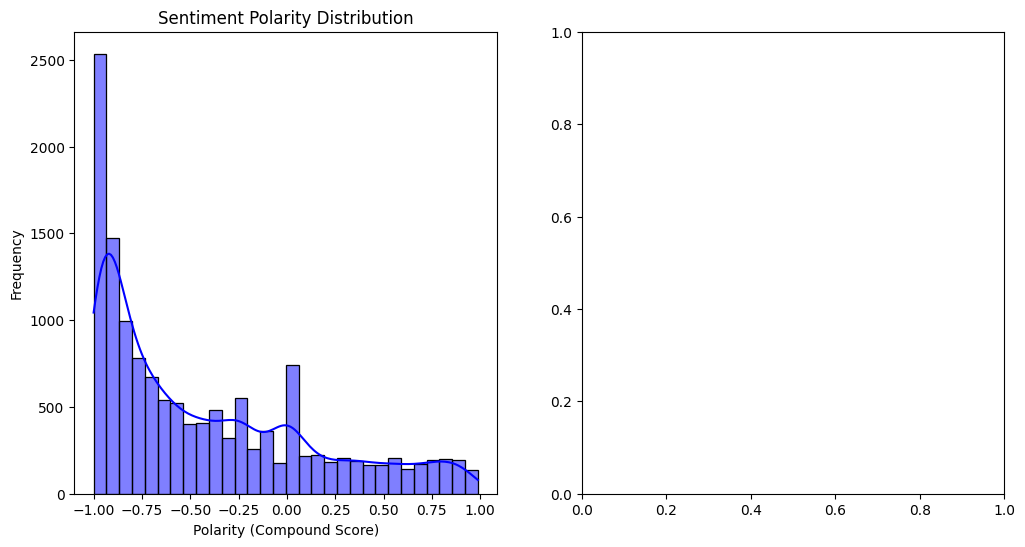

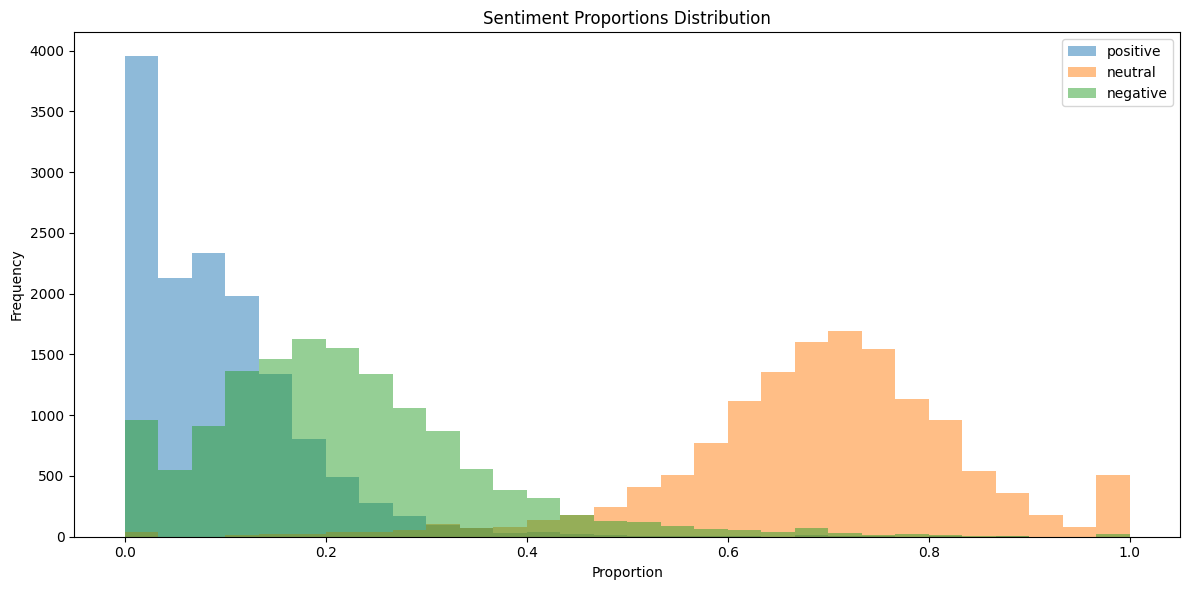

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the sentiment polarity distribution (VADER's compound score)
plt.figure(figsize=(12, 6))

# Plot polarity
plt.subplot(1, 2, 1)
sns.histplot(data_notes['compound'], bins=30, kde=True, color='blue')
plt.title('Sentiment Polarity Distribution')
plt.xlabel('Polarity (Compound Score)')
plt.ylabel('Frequency')

# Plot positive, neutral, and negative sentiment proportions
plt.subplot(1, 2, 2)
data_notes[['positive', 'neutral', 'negative']].plot(kind='hist', bins=30, alpha=0.5, histtype='bar', figsize=(12, 6))
plt.title('Sentiment Proportions Distribution')
plt.xlabel('Proportion')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

 **Key Observations**

 Distribution Shapes:

**Positive Sentiment**:

The distribution for positive sentiment is skewed to the right, indicating a higher frequency of texts with a smaller proportion of positive sentiment. There's a long tail towards higher proportions, suggesting a smaller number of texts with predominantly positive sentiment.


**Neutral Sentiment:**

The neutral sentiment distribution is relatively symmetrical, with a peak around the middle, suggesting a balanced distribution of texts with neutral sentiment proportions.

**Negative Sentiment:**

Similar to positive sentiment, the negative sentiment distribution is skewed to the right, indicating a higher frequency of texts with a smaller proportion of negative sentiment.



**Overlapping Distributions:**

The distributions for all three sentiment categories overlap significantly, indicating that many texts exhibit a mix of sentiments rather than being purely positive, neutral, or negative.

**Interpretation in Relation to the Dataset**


**Mixed Sentiments:**

The majority of the texts in the dataset likely contain a mix of positive, negative, and neutral sentiments, as evidenced by the overlapping distributions.

**Dominant Neutral Sentiment:**

The relatively symmetrical distribution of neutral sentiment suggests that a significant portion of the texts expresses a neutral viewpoint.

**Less Extreme Sentiments:**

The rightward skew of both positive and negative sentiment distributions indicates that most texts lean towards a more neutral stance rather than expressing strong positive or negative emotions.

Potential Insights

This visualization highlights the complexity of sentiment analysis, as many texts exhibit nuanced and mixed emotional expressions.

###  4.1.2 Textual Coherencing using Latent Dirichlet Allocation (LDA)

In [22]:
import re
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import gensim
from gensim import corpora
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt
import seaborn as sns

# Tokenize text for LDA
tokenized_notes = [preprocess_text(note).split() for note in data_notes['cleaned_notes']]

# Create dictionary and corpus for LDA
dictionary = corpora.Dictionary(tokenized_notes)
corpus = [dictionary.doc2bow(text) for text in tokenized_notes]

# Create LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=tokenized_notes, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print(f'Coherence Score: {coherence_lda}')

Coherence Score: 0.36928316333084765


**Intepretation of textual coherence score**

A coherence score of 0.3692

This indicates the degree to which the words in each topic are semantically related. Generally, coherence scores range from 0 to 1, with higher values suggesting that the words within a topic are more closely related.

**Interpreting Coherence Scores**

*Low Coherence Score (< 0.3):*

Indicates that the topics may not be very interpretable or meaningful. The words in the topics might not co-occur in a way that makes sense.

*Moderate Coherence Score (0.3 - 0.5):*

Suggests that the topics are somewhat interpretable, but there may be room for improvement. Some topics may be more meaningful than others.

*High Coherence Score (> 0.5):*

Indicates that the topics are more interpretable and the words within each topic are highly related.

In [25]:
from gensim.models import LdaModel
from gensim.corpora import Dictionary
from gensim.models.coherencemodel import CoherenceModel

# Prepare your corpus and dictionary
texts = data_notes['cleaned_notes'].apply(lambda x: x.split())
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# Test different numbers of topics
for num_topics in range(5, 15, 2):
    lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)
    coherence_model = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    print(f'Number of Topics: {num_topics}, Coherence Score: {coherence_score}')

Number of Topics: 5, Coherence Score: 0.3937524888802811
Number of Topics: 7, Coherence Score: 0.41678578321054205
Number of Topics: 9, Coherence Score: 0.4276075331199691
Number of Topics: 11, Coherence Score: 0.42304576648646697
Number of Topics: 13, Coherence Score: 0.4987496769992307


The coherence scores obtained indicate that the topic model’s quality improves as the number of topics increases, with the highest score observed at 13 topics.

In [27]:
for num_topics in range(15, 25, 2):
    lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)
    coherence_model = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    print(f'Number of Topics: {num_topics}, Coherence Score: {coherence_score}')

Number of Topics: 15, Coherence Score: 0.46794030784001683
Number of Topics: 17, Coherence Score: 0.46380943736401903
Number of Topics: 19, Coherence Score: 0.4285231799935653
Number of Topics: 21, Coherence Score: 0.4568459430544956
Number of Topics: 23, Coherence Score: 0.44087473988551656


The coherence scores we have obtained indicate that the model with 15 topics has the highest coherence score of 0.4679, which is quite good.

Let's review the topics generated by the 15-topic model to ensure they align with our expectations and make sense in the context of the dataset.

In [29]:
# Review the 15 topic model
lda_model_15 = LdaModel(corpus, num_topics=15, id2word=dictionary, passes=30, alpha='auto', eta='auto')
topics = lda_model_15.print_topics(num_words=10)
for topic in topics:
    print(topic)

(0, '0.056*"police" + 0.018*"protester" + 0.013*"officer" + 0.012*"riot" + 0.011*"city" + 0.010*"road" + 0.009*"town" + 0.008*"hundred" + 0.008*"yesterday" + 0.007*"wa"')
(1, '0.028*"government" + 0.026*"worker" + 0.025*"strike" + 0.024*"union" + 0.024*"protest" + 0.011*"farmer" + 0.010*"demand" + 0.010*"yesterday" + 0.009*"price" + 0.008*"public"')
(2, '0.138*"woman" + 0.028*"child" + 0.019*"rape" + 0.017*"girl" + 0.016*"court" + 0.014*"right" + 0.014*"case" + 0.013*"men" + 0.012*"abortion" + 0.010*"murder"')
(3, '0.273*"student" + 0.103*"university" + 0.074*"school" + 0.063*"teacher" + 0.037*"education" + 0.026*"campus" + 0.015*"college" + 0.014*"fee" + 0.013*"nuclear" + 0.011*"parent"')
(4, '0.026*"fisherman" + 0.020*"reuters" + 0.020*"fighter" + 0.019*"ex" + 0.012*"fishing" + 0.012*"fish" + 0.011*"rice" + 0.011*"monument" + 0.010*"beach" + 0.010*"tribe"')
(5, '0.075*"police" + 0.039*"gas" + 0.036*"tear" + 0.027*"fired" + 0.025*"injured" + 0.024*"said" + 0.021*"clash" + 0.018*"kille

*Topic 0:* Law Enforcement and Public Order

Focuses on police, officers, and riot-related terms, suggesting this topic is concerned with issues related to police actions, public order, and possibly protests or civil unrest.

*Topic 1:* Labor and Strikes

Includes terms related to government, workers, strikes, unions, and demands. This topic likely revolves around labor movements, strikes, and worker demands.

*Topic 2:* Gender and Violence

Centers on terms like woman, child, rape, and court. This topic is related to gender issues, violence against women, and legal cases involving gender-based violence.

*Topic 3:* Education

Focuses on students, universities, schools, and related educational terms. This topic likely deals with issues related to education, student protests, and educational institutions.

*Topic 4:* Fishing and Local Community

Includes terms like fisherman, fishing, and beach. This topic seems to address issues related to fishing communities and local economic activities related to fishing.

*Topic 5:* Police Violence and Conflict

Features terms related to police actions (gas, tear, fired, injured) and conflicts. This topic seems to cover incidents of police violence and confrontations during protests or riots.

*Topic 6:* Government and Authority

Contains terms like parade, junta, and magistrate. This topic might be related to government authority, military or political parades, and legal or judicial matters.

*Topic 7:* Political Opposition and Elections

Includes terms like opposition, party, and election. This topic is likely focused on political parties, elections, and political opposition.

*Topic 8:* Government and Legislative Matters

Features terms related to government, parliament, and ministers. This topic might cover legislative processes, government announcements, and political discussions.

*Topic 9:* Data and Decision Making

Contains terms related to data analysis (source, coding, decision) and possibly administrative or managerial aspects. This topic might focus on data handling and decision-making processes.

*Topic 10:* Religion and Citizenship

Focuses on religious and citizenship terms, including Muslim, Christian, and Turkish. This topic is likely concerned with issues related to religion, religious groups, and citizenship rights.

*Topic 11:* Criminal Justice

Includes terms related to prison, prisoner, and sentence. This topic likely addresses issues related to the criminal justice system, incarceration, and sentencing.

*Topic 12:* General Protests and Demonstrations

Contains terms related to protests, people, and government. This topic appears to cover general aspects of protests and demonstrations, including participant numbers and governmental responses.

*Topic 13:* Mass Mobilization

Features terms like thousand, marched, and rally. This topic likely focuses on large-scale protests or rallies and the organization of mass mobilization events.

*Topic 14:* International Affairs and Conflict

Includes terms related to international issues (Iraq, UN, asylum) and conflict. This topic seems to address global issues, international relations, and conflicts.

### 4.1.3 Assign topics to each document

In [31]:
# Initialize the VADER sentiment intensity analyzer
sid = SentimentIntensityAnalyzer()

# Function to get sentiment scores
def get_sentiment(text):
    sentiment = sid.polarity_scores(text)
    return sentiment['compound'], sentiment['neu'], sentiment['pos'], sentiment['neg']

# Apply sentiment analysis to the 'cleaned_notes' column
data_notes[['sentiment_polarity', 'sentiment_neutral', 'sentiment_positive', 'sentiment_negative']] = data_notes['cleaned_notes'].apply(lambda x: pd.Series(get_sentiment(x)))
# Display sentiment analysis results
data_notes[['cleaned_notes', 'sentiment_polarity', 'sentiment_neutral', 'sentiment_positive', 'sentiment_negative']]

,cleaned_notes,sentiment_polarity,sentiment_neutral,sentiment_positive,sentiment_negative
0,canada railway passenger system wa finally cut...,-0.8316,0.866,0.000,0.134
1,protestors identified young people gathering w...,0.0000,1.000,0.000,0.000
2,queen calling canadian remain united braved pr...,0.8720,0.695,0.203,0.103
3,canada federal government ha agreed acquire tr...,-0.8481,0.736,0.103,0.160
4,protest directed state due refusal use violenc...,-0.5423,0.535,0.139,0.326
...,...,...,...,...,...
15071,government inquiry launched serious question r...,-0.9920,0.603,0.058,0.339
15072,police papua new guinea fired gunshot wednesda...,-0.9943,0.697,0.046,0.257
15073,bougainville government ha enacted indefinite ...,-0.8519,0.787,0.061,0.152
15074,peter neill ha reappointed prime minister papu...,-0.9561,0.753,0.075,0.173


**Sentiment Polarity:**

Indicates the overall sentiment of the text, ranging from -1 (very negative) to 1 (very positive). For example, a polarity of -0.8316 suggests a very negative sentiment, while 0.8720 suggests a very positive sentiment.

Sentiment Neutrality:
Indicates the proportion of neutral sentiment in the text. A high value, like 1.000, means the text is neutral with no positive or negative sentiment.

Sentiment Positivity: Measures the proportion of positive sentiment in the text. A value of 0.203 indicates a low level of positivity.

Sentiment Negativity: Measures the proportion of negative sentiment in the text. A value of 0.134 indicates a moderate level of negativity.

In [32]:
from gensim.models import LdaModel

# Save the LDA model
lda_model.save('lda_model_15')

In [34]:
# Assign Topics to each Document
from gensim.models import LdaModel

# Load LDA model
lda_model = LdaModel.load('lda_model_15')  

# Assign topics to each document
data_notes['topic'] = [max(lda_model[doc], key=lambda x: x[1])[0] for doc in corpus]

In [35]:
# Extract Top words for each topic
num_words = 10  # Number of top words to display per topic

topics = lda_model.show_topics(num_topics=-1, num_words=num_words, formatted=False)
top_words_per_topic = {topic[0]: [word[0] for word in topic[1]] for topic in topics}

# Display top words for each topic
for topic_num, words in top_words_per_topic.items():
    print(f"Topic {topic_num}: {', '.join(words)}")

Topic 0: iraq, greece, italy, spain, bombing, u, spanish, prayer, withdrawal, grand
Topic 1: woman, rape, violence, girl, turkey, men, child, abortion, islamabad, gov
Topic 2: prison, prisoner, turkish, release, iran, chain, jail, sentenced, inmate, jailed
Topic 3: farmer, protest, date, plant, unclear, russia, european, miner, eu, german
Topic 4: health, hospital, pakistan, doctor, trader, medical, market, nurse, drug, treatment
Topic 5: student, university, school, education, campus, protest, teacher, college, high, class
Topic 6: said, police, people, wa, killed, protest, security, two, arrested, least
Topic 7: based, decision, prior, number, source, actual, included, provided, wa, protester
Topic 8: school, child, parent, pupil, councillor, asylum, asia, john, tribal, seeker
Topic 9: military, soldier, army, rebel, minister, indian, base, commander, civilian, force
Topic 10: protest, government, said, city, wa, street, ha, people, demonstration, protester
Topic 11: wa, protest, rig

Topic 0: Likely related to geopolitical issues involving countries like Iraq, Greece, Italy, and Spain, possibly concerning military actions or interventions (e.g., "bombing," "withdrawal").

Topic 1: Focused on gender-based violence and issues concerning women and children, including rape, violence, and abortion.

Topic 2: Related to prisons and incarceration, possibly highlighting issues around prisoners, sentences, and prison conditions.

Topic 3: Likely related to protests involving farmers or other labor groups, possibly in the context of agricultural or labor disputes, with mentions of Russia and the EU.

Topic 4: Centered on healthcare issues, including hospitals, doctors, and medical treatments, with a focus on Pakistan.

Topic 5: Related to education, including student protests, universities, schools, and teachers.

Topic 6: Describes incidents involving police and public security, including protests where people were arrested or killed.

Topic 7: Appears to be about decision-making processes, possibly in a bureaucratic or governmental context, with mentions of sources and provided information.

Topic 8: Focused on issues concerning children, schools, and parents, possibly in the context of asylum and tribal issues.

Topic 9: Related to military actions and conflicts, with mentions of soldiers, armies, and commanders, possibly in an Indian context.

Topic 10: General protest topic involving government, cities, and street demonstrations.

Topic 11: A broader topic on rights, laws, and groups involved in protests, possibly focusing on legal and civil rights issues.

Topic 12: This topic might be more localized, focusing on community issues such as local governance (councils) and land-related protests.

Topic 13: Involves police actions during protests, including the use of tear gas and riot control measures.

Topic 14: Focused on rallies, often associated with activism, democracy movements, or independence struggles.

Topic 15: May be related to specific events in Paris or other cities, possibly involving public demonstrations and legal or artistic matters.

Topic 16: Focused on French-related issues, possibly involving migrants, terrorism, and social unrest.

Topic 17: Related to labor strikes and workers' protests, focusing on unions, wages, and demands for better conditions.

Topic 18: Involves international issues, possibly concerning refugee camps or conflicts involving China.

Topic 19: Focuses on articles or reports concerning protests, with an emphasis on participation and numbers.

Topic 20: Centered on opposition parties, elections, and political protests, often involving large numbers of participants.

Topic 21: Focused on road blockages and traffic disruptions, possibly in the context of fuel prices or religious (Muslim) issues.

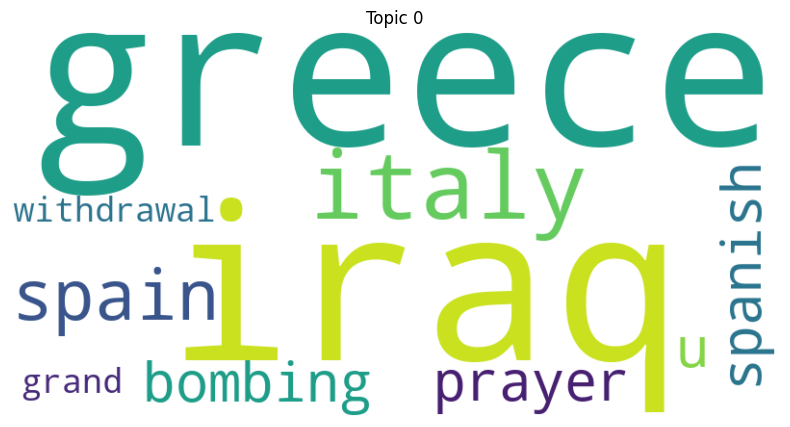

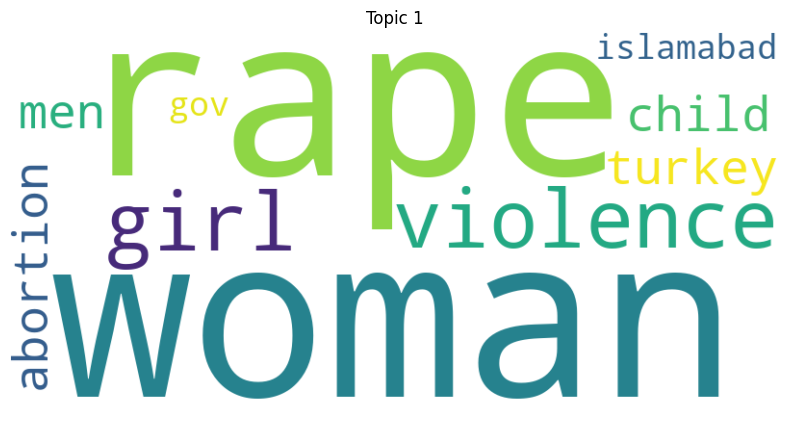

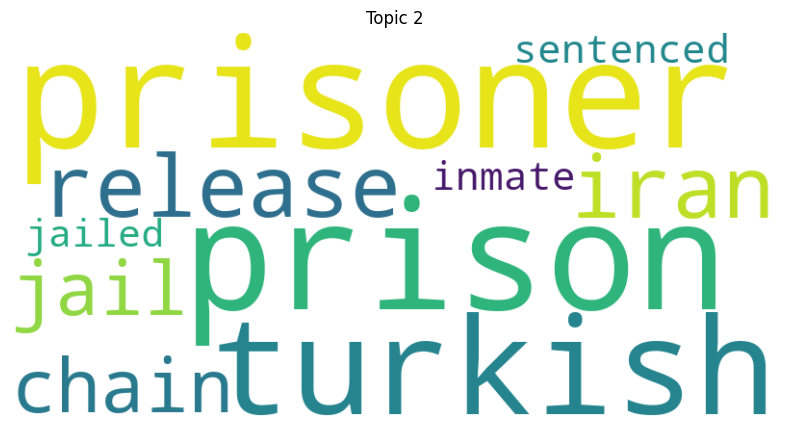

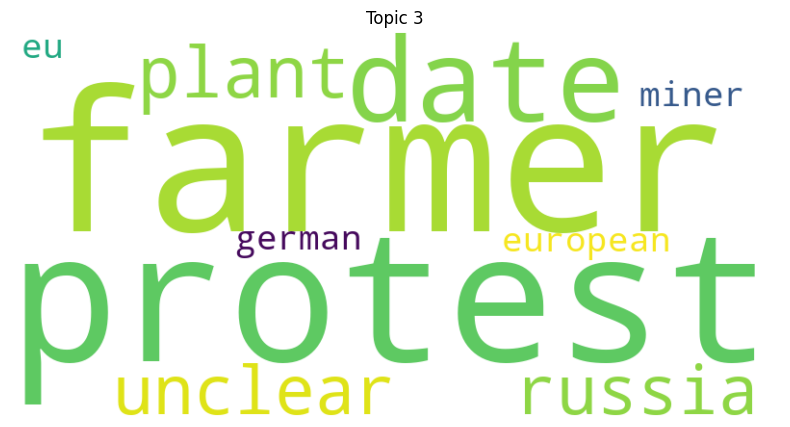

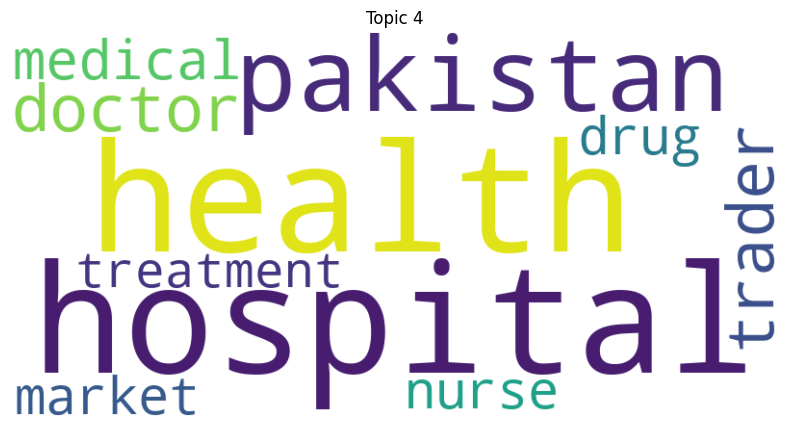

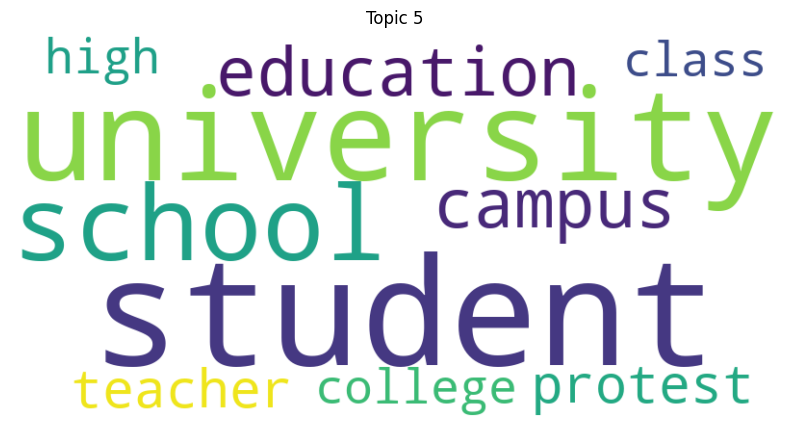

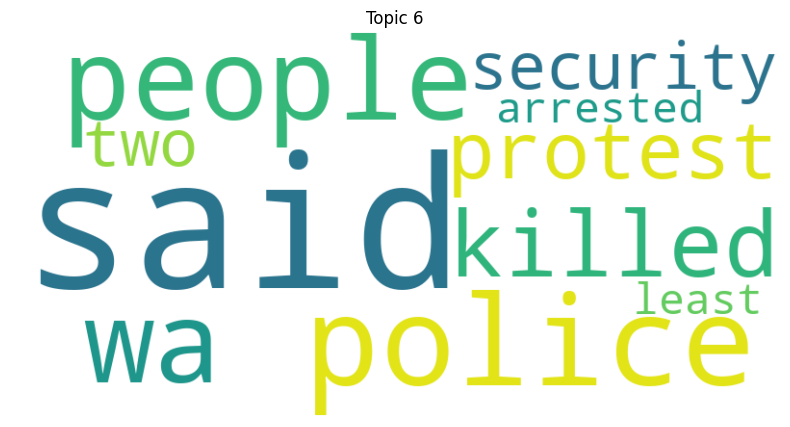

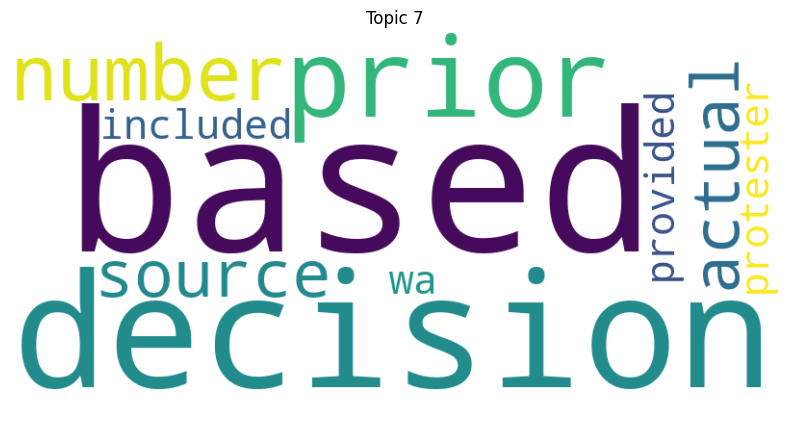

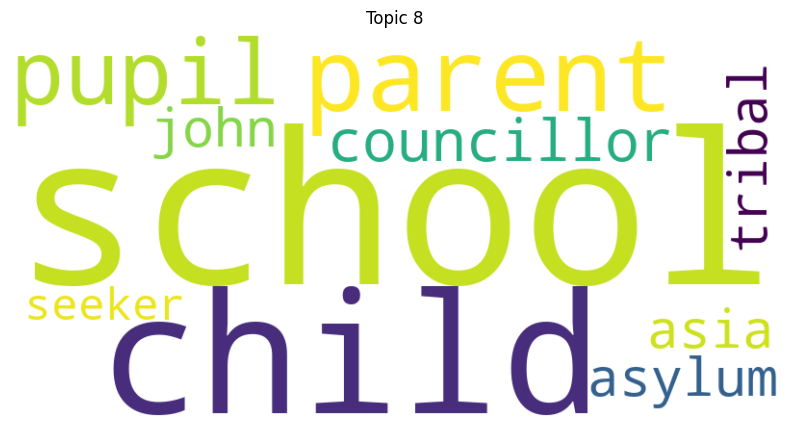

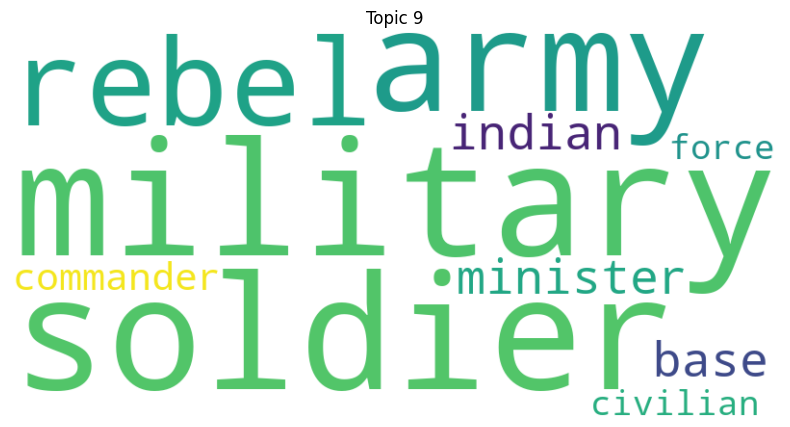

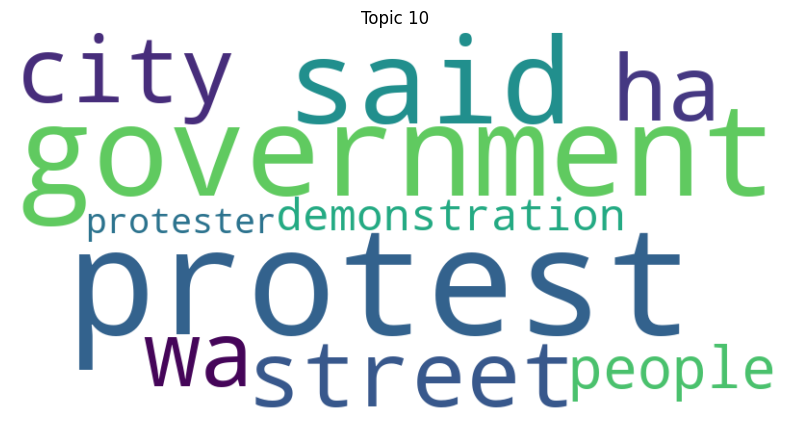

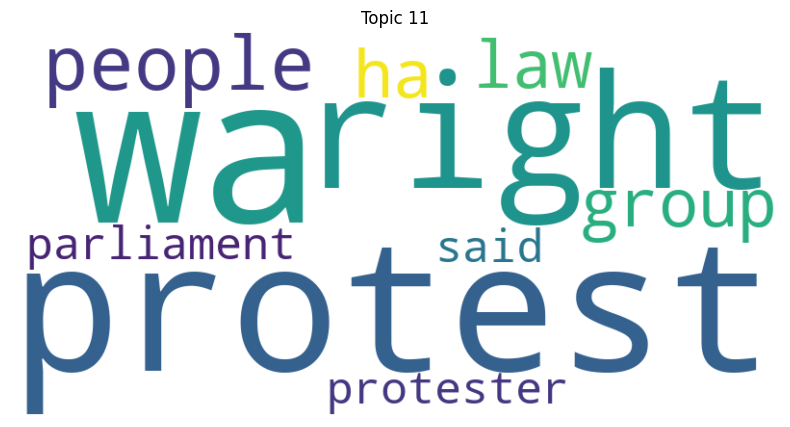

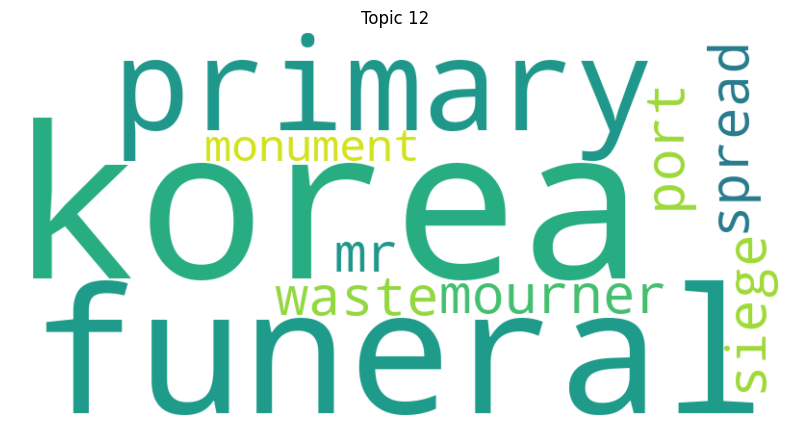

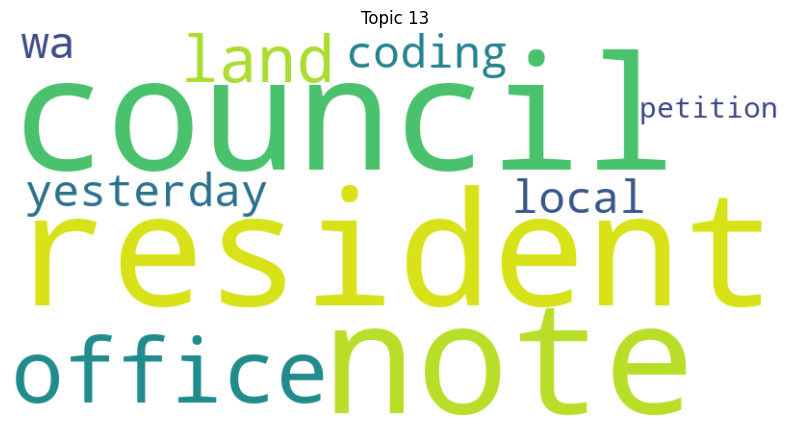

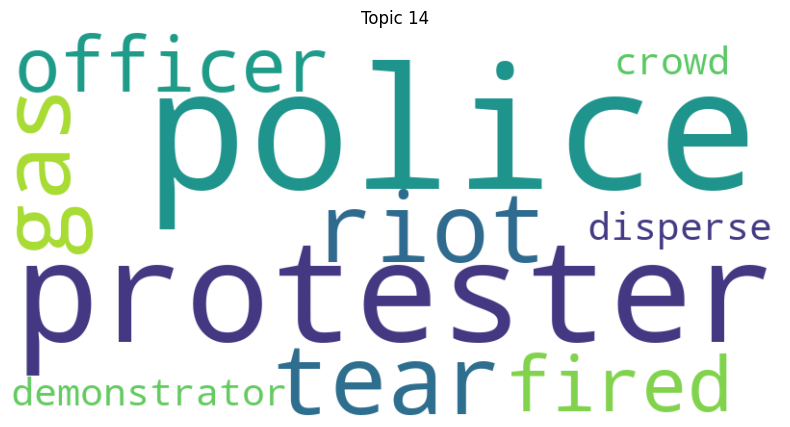

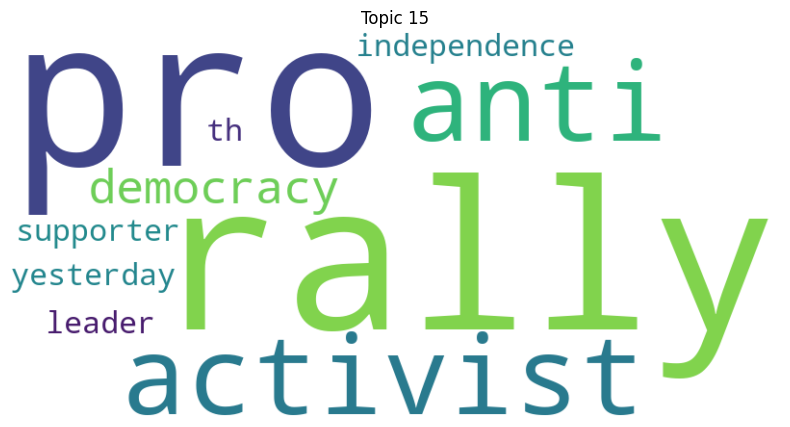

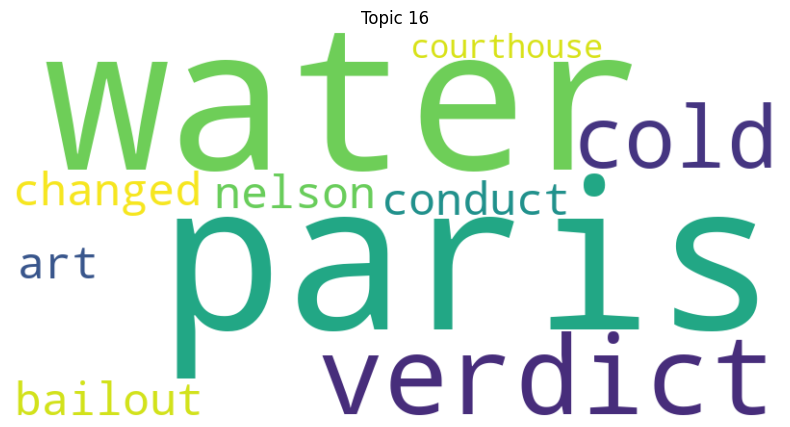

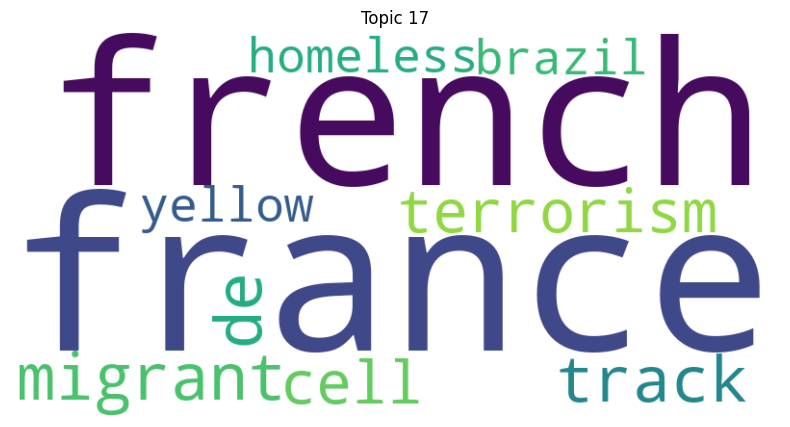

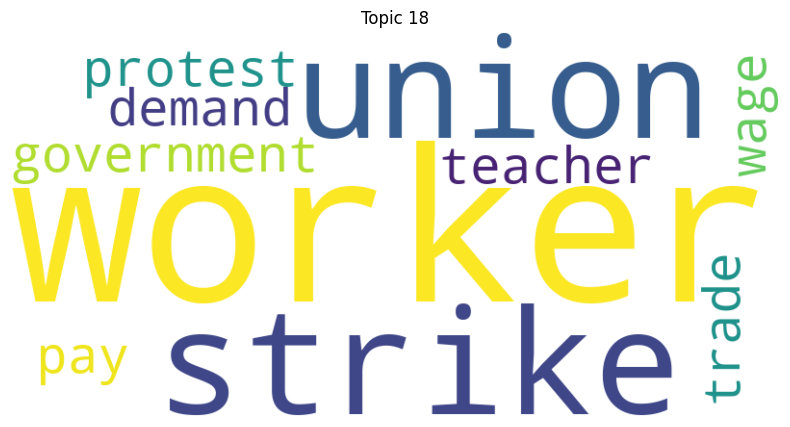

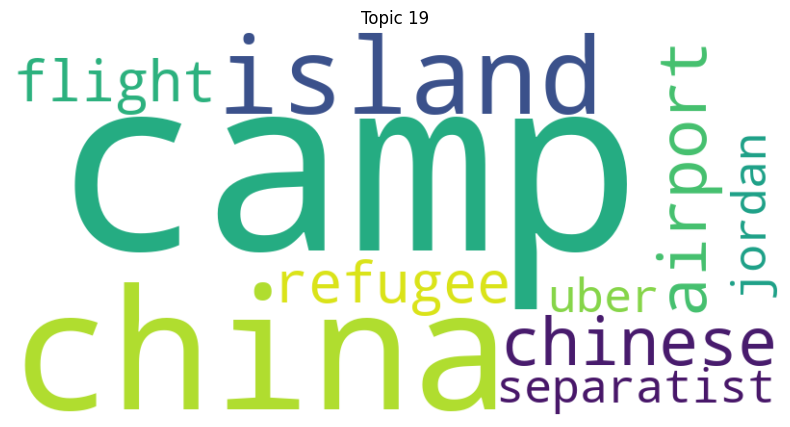

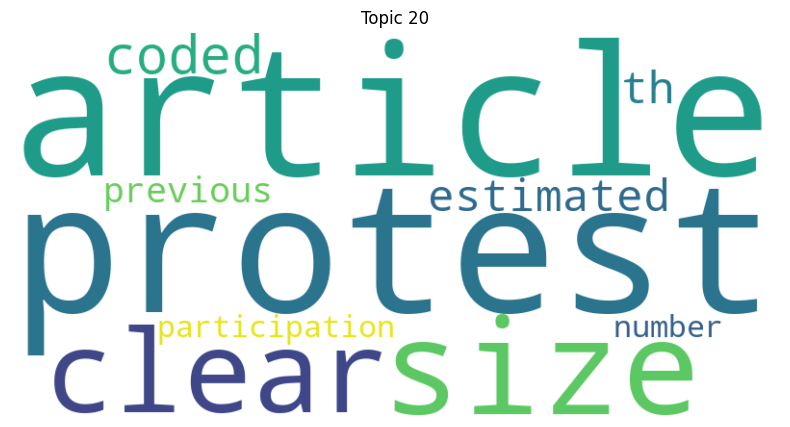

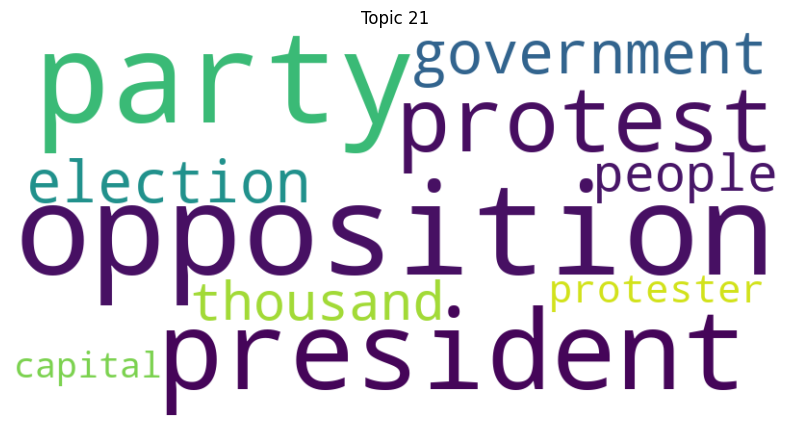

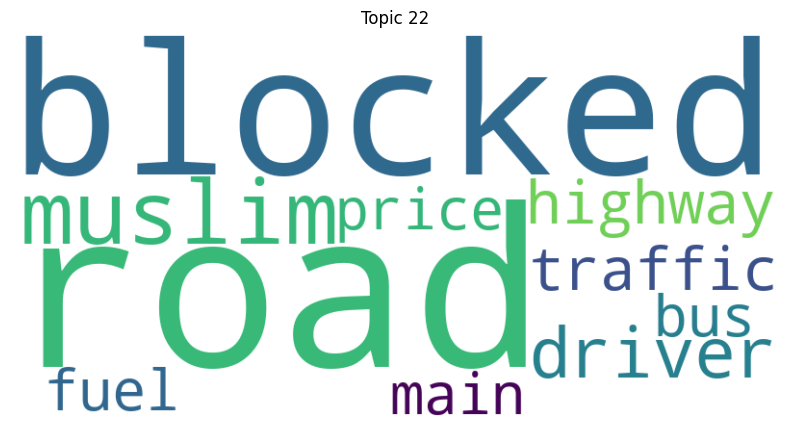

In [36]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to generate word cloud from top words
def generate_wordcloud(words):
    text = ' '.join(words)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    return wordcloud

# Plot word clouds for each topic
for topic_num, words in top_words_per_topic.items():
    plt.figure(figsize=(10, 5))
    wordcloud = generate_wordcloud(words)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Topic {topic_num}")
    plt.show()

The word clouds show the fifteentopics and the words which are commonly used in each topic

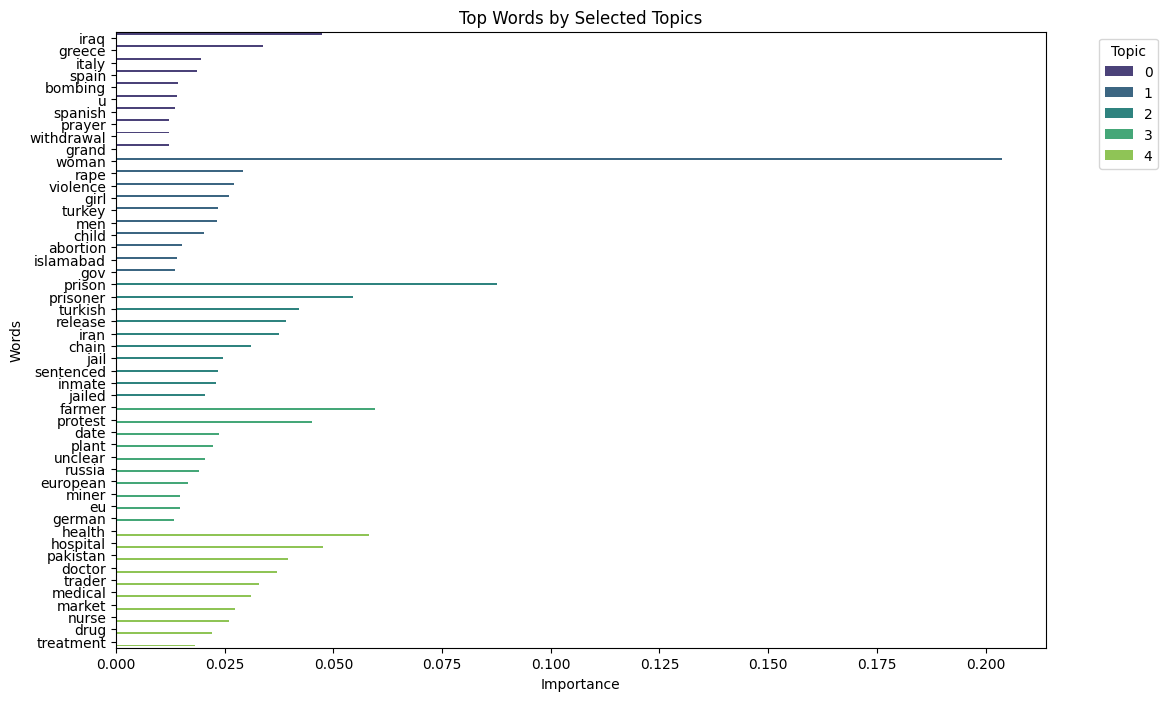

In [39]:
# Prepare data for a subset of topics
def prepare_word_data(topic_id, words):
    word_df = pd.DataFrame(words, columns=['Word', 'Importance'])
    word_df['Topic'] = topic_id
    return word_df

# Select a subset of topics (topics 0 to 4)
selected_topics = [0, 1, 2, 3, 4]  
word_data_subset = pd.concat([prepare_word_data(topic_num, lda_model.show_topic(topic_num, num_words)) for topic_num in selected_topics])

# Plot bar chart of most significant words
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Word', hue='Topic', data=word_data_subset, palette='viridis')
plt.title('Top Words by Selected Topics')
plt.xlabel('Importance')
plt.ylabel('Words')
plt.legend(title='Topic', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

The plot provides insights into the thematic composition of each topic.

Word Importance: Longer bars indicate that a word is more central or representative of a particular topic. For example, "police," "protester," and "protest" are highly important for Topic 0.

Topic Overlap: Some words appear in multiple topics, suggesting potential overlaps or related themes between these topics. For instance, "government" appears in several topics, indicating its relevance across different contexts.

Topic Differentiation: The distinct word distributions for different topics highlight the unique characteristics of each theme. For instance, Topic 1 focuses on health-related terms like "hospital," "doctor," and "nurse," while Topic 2 is more associated with public gatherings and protests, with words like "rally," "thousand," and "marched."

In [41]:
# Analyze sentiment by topic
sentiment_by_topic = data_notes.groupby('topic').agg({
    'sentiment_polarity': 'mean',
    'sentiment_neutral': 'mean',
    'sentiment_positive': 'mean',
    'sentiment_negative': 'mean'
}).reset_index()

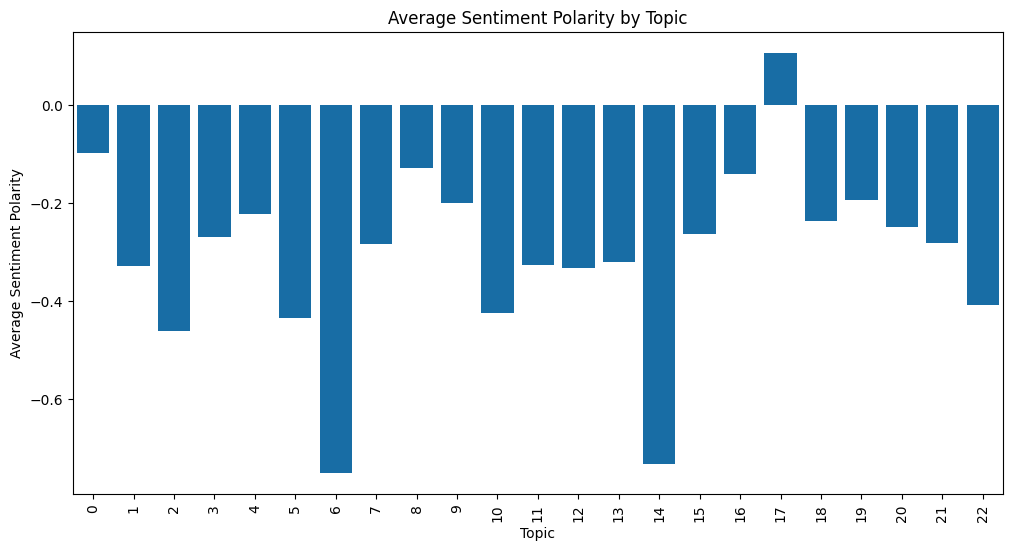

In [70]:
# Plot sentiment polarity by topic
plt.figure(figsize=(12, 6))
sns.barplot(x='topic', y='sentiment_polarity', data=sentiment_by_topic, color='#0072bc')
plt.title('Average Sentiment Polarity by Topic')
plt.xlabel('Topic')
plt.ylabel('Average Sentiment Polarity')
plt.xticks(rotation=90)
plt.show()

This bar chart shows the Average Sentiment Polarity by Topic. The sentiment polarity likely ranges from -1 (most negative) to +1 (most positive), with 0 being neutral.

Interpretation:

Negative Sentiment (Below 0):

Most Negative Topics:
Topic 14 (Police and riots, likely involving harsh responses like tear gas and crowd dispersal) and Topic 6 (Police actions and security during protests where people were killed or arrested) have the most negative sentiment polarity, indicating that the discussions surrounding these topics tend to be particularly negative.

Other Negative Topics:
Topics like 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 18, 20, and 22 also have negative sentiment but are less extreme. These topics likely involve discussions around violence, protests, government actions, and possibly other issues like incarceration, health concerns, and strikes, all of which tend to be associated with more negative sentiment.

Neutral to Slightly Negative Sentiment (Around 0):
Topics 0, 1, and 16 have sentiment polarities close to 0, indicating a more neutral or slightly negative sentiment. These topics might involve discussions that are less emotionally charged or more balanced between negative and positive aspects.
Positive Sentiment (Above 0):

Topic 17 is the only one with a positive sentiment polarity. This could indicate discussions that are less conflict-driven or focus on more constructive or positive outcomes, possibly related to topics like "French issues" or "social movements" mentioned in your earlier topic descriptions.

Conclusion:
The topics with the most negative sentiment likely reflect events or discussions with high emotional impact, such as violence, oppression, or severe social issues.
The more neutral topics could involve complex geopolitical or social issues where perspectives might be more balanced.
The single positive topic suggests an area where there is less conflict or more positive discourse.

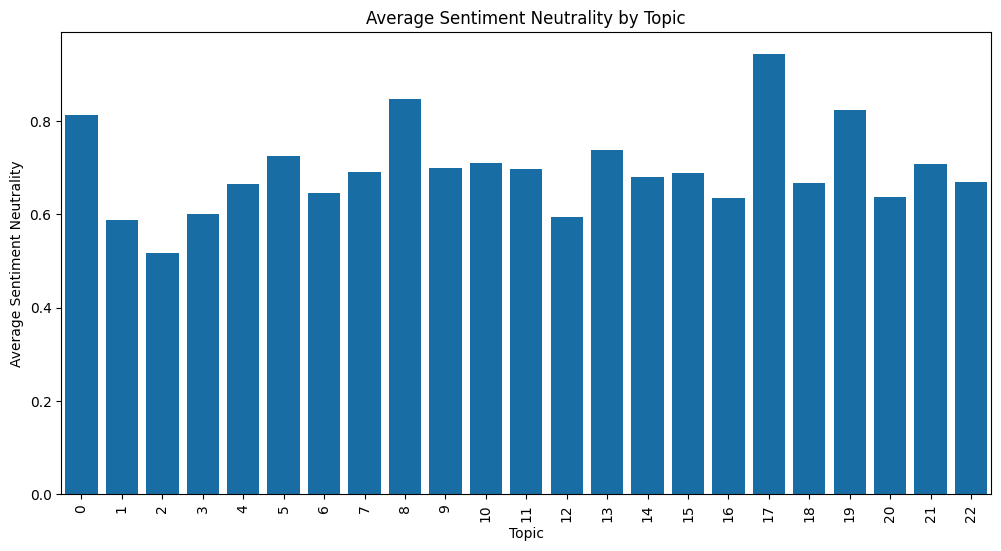

In [71]:
# Plot sentiment neutrality by topic
plt.figure(figsize=(12, 6))
sns.barplot(x='topic', y='sentiment_neutral', data=sentiment_by_topic, color='#0072bc')
plt.title('Average Sentiment Neutrality by Topic')
plt.xlabel('Topic')
plt.ylabel('Average Sentiment Neutrality')
plt.xticks(rotation=90)
plt.show()

The above graph illustrates the average sentiment neutrality for 22 different topics. Sentiment neutrality is a measure of how objective or neutral the text is, with values ranging from 0 to 1. A higher value indicates a more neutral sentiment.

Key Observations

**Wide Range of Neutrality:** The graph shows significant variation in average sentiment neutrality across the different topics.

**Neutral Topics:** Topics represented by bars closer to the top of the graph exhibit higher levels of neutrality.

**Non-Neutral Topics:** Topics with bars closer to the bottom of the graph tend to have more subjective or opinionated content.


The graph provides insights into the overall sentiment tone of the text data associated with these topics.

**Diverse Sentiment Landscape:** The wide range of neutrality scores suggests that the dataset encompasses topics with varying degrees of objectivity and subjectivity.

**Neutral Topics:** Topics with high average neutrality might involve factual reporting, news articles, or data-driven content.

**Non-Neutral Topics:** Topics with low average neutrality could be related to opinion pieces, reviews, or discussions that express personal viewpoints.

This bar chart shows the Average Sentiment Neutrality by Topic. Neutrality scores likely range from 0 to 1, where 0 indicates no neutrality (i.e., very polarized sentiment) and 1 indicates complete neutrality.

Interpretation:

High Neutrality (Above 0.7):
Topic 0: Exhibits the highest neutrality score, suggesting that discussions in this topic are generally more neutral, with less emotional or polarized sentiment.
Topic 17: Also has a high neutrality score, indicating that the content related to this topic is fairly balanced and neutral in tone.
Topic 16: This topic is also quite neutral, which could imply that the discussions are less charged and more factual or balanced.

Moderate Neutrality (Between 0.5 and 0.7):
A large number of topics fall within this range, such as Topics 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 18, 19, 20, and 21. These topics show a mix of neutrality and some polarized sentiment, indicating a balance between factual content and emotionally charged discussions.

Lower Neutrality (Below 0.5):
Topics 1, 2, 3: These topics have lower neutrality scores, meaning that discussions around these topics are more emotionally charged, with less neutral content.
Topic 22: Also has a relatively lower neutrality score, suggesting more polarized or emotionally driven discussions.

Correlation with Polarity:
The topics with higher neutrality often correlate with lower absolute sentiment polarity values, indicating that these discussions are less likely to be extremely positive or negative.
Topics with lower neutrality scores (e.g., Topics 1, 2, 3) tend to correspond with topics that had higher absolute sentiment polarity values, meaning these topics evoke stronger emotions.

Conclusion:

Topics 0 and 17 are generally more neutral, reflecting discussions that are less emotionally charged and more balanced.
Topics 1, 2, 3, and 22 are less neutral, indicating that these topics evoke stronger emotional reactions, leading to more polarized sentiment.
Understanding neutrality in discussions can help identify which topics are more prone to emotional or biased discourse and which are approached in a more balanced or factual manner. This insight is valuable in analyzing public sentiment and the nature of discussions surrounding various protest-related topics.

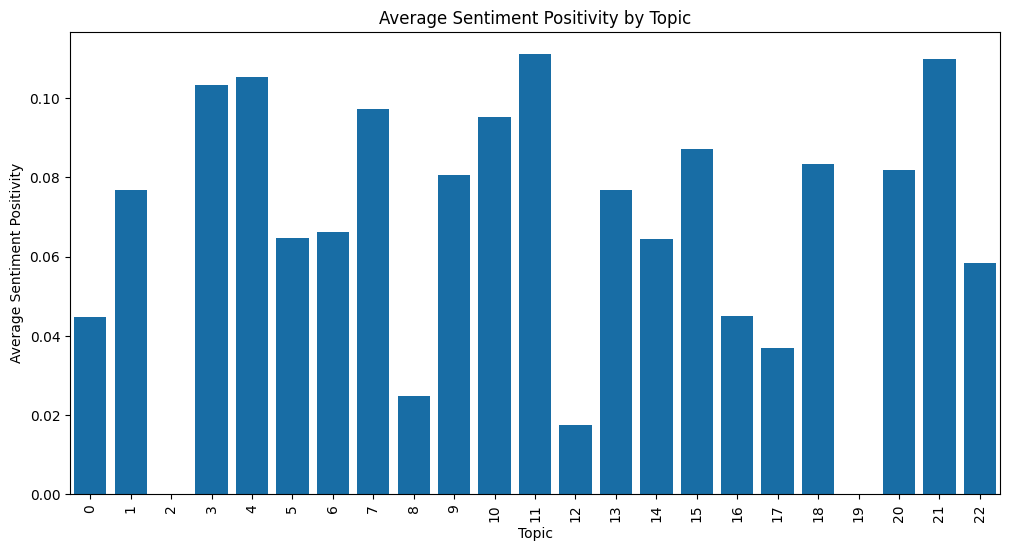

In [72]:
# Plot sentiment positivity by topic
plt.figure(figsize=(12, 6))
sns.barplot(x='topic', y='sentiment_positive', data=sentiment_by_topic, color='#0072bc')
plt.title('Average Sentiment Positivity by Topic')
plt.xlabel('Topic')
plt.ylabel('Average Sentiment Positivity')
plt.xticks(rotation=90)
plt.show()

This bar chart shows the Average Sentiment Positivity by Topic. The positivity score ranges from 0 to 1, where 0 indicates no positivity and 1 indicates complete positivity in sentiment.

Interpretation:

High Positivity (Above 0.09):

Topics 10, 11, 22, and 3 exhibit the highest positivity scores, indicating that discussions within these topics contain more positive sentiment.
Topic 10: Possibly involves some constructive or optimistic discussions related to protests.
Topic 11: Could reflect positive or hopeful aspects regarding rights, law, or group efforts.
Topic 22: Indicates high positivity, possibly related to discussions about opposition, parties, or elections.
Topic 3: Related to areas such as farming, possibly reflecting positive developments or community support.

Moderate Positivity (Between 0.05 and 0.09):

Topics 1, 2, 4, 5, 6, 7, 12, 13, 15, 20, and 21 fall into this range, indicating a moderate level of positive sentiment.
Topic 15: Likely includes discussions on democracy and independence, which could evoke a sense of positivity and progress.
Topic 7: Could relate to decision-making or evaluations, which may contain some positive outcomes.

Lower Positivity (Below 0.05):

Topics 0, 8, 14, 16, 17, 18 display lower positivity scores, suggesting that the discussions within these topics are less positive and might lean toward more neutral or negative tones.
Topic 14: Involves police and riots, which is consistent with lower positivity due to the negative nature of these discussions.
Topic 16 and 17: Could relate to more serious or contentious issues that don't evoke much positivity.
Correlation with Polarity and Neutrality:
Higher positivity often correlates with lower negative polarity, indicating topics where positive aspects outweigh negative sentiment.
Topics with higher positivity are likely to show lower neutrality, as positive sentiment indicates a deviation from neutrality.

Conclusion:

Topics 10, 11, 22, and 3 are characterized by relatively higher positivity, indicating that these topics are generally viewed more favorably or involve more optimistic discussions.
Topics 14, 16, and 17 have lower positivity, indicating that discussions are more neutral or negative, likely due to the nature of the topics involved.
Understanding the sentiment positivity helps in identifying which protest-related topics are seen in a more positive light and which are more likely to be associated with negative or neutral sentiment.

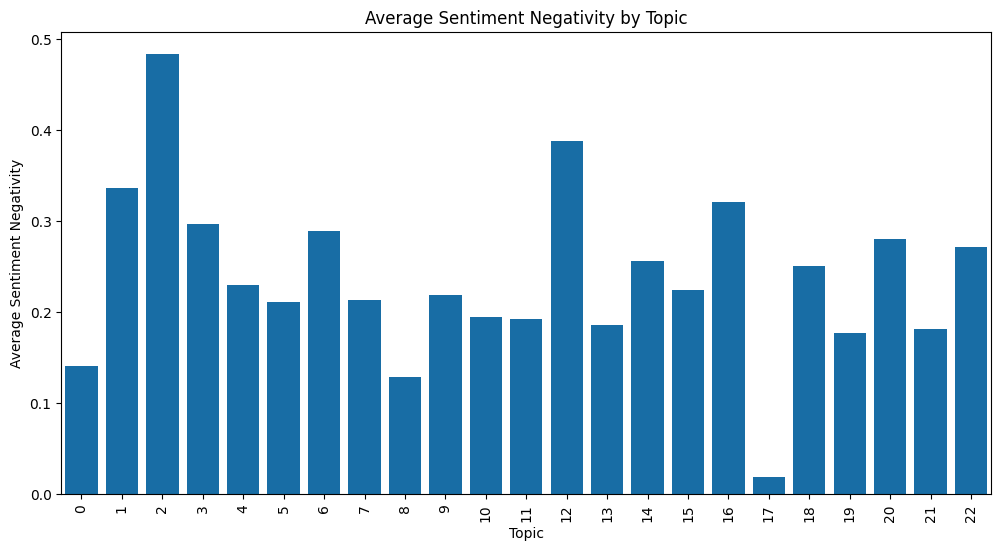

In [73]:
# Plot sentiment negativity by topic
plt.figure(figsize=(12, 6))
sns.barplot(x='topic', y='sentiment_negative', data=sentiment_by_topic, color='#0072bc')
plt.title('Average Sentiment Negativity by Topic')
plt.xlabel('Topic')
plt.ylabel('Average Sentiment Negativity')
plt.xticks(rotation=90)
plt.show()


###**Average sentiment negativity**

The above graph illustrates the average sentiment negativity for 22 different topics. Sentiment negativity is a measure of how negative the text is, with values ranging from 0 to 0.5. A higher value indicates a more negative sentiment.

**Key Observations**

Wide Range of Negativity: The graph shows significant variation in average sentiment negativity across the different topics.

Negative Topics: Topics represented by bars closer to the top of the graph exhibit higher levels of negativity.

Neutral/Positive Topics: Topics with bars closer to the bottom of the graph tend to have more neutral or positive content.


The graph provides insights into the overall sentiment tone of the text data associated with these topics.

Diverse Sentiment Landscape: The wide range of negativity scores suggests that the dataset encompasses topics with varying degrees of pessimism and optimism.

Negative Topics: Topics with high average negativity might involve negative events, criticisms, or problems.

Neutral/Positive Topics: Topics with low average negativity could be related to positive news, achievements, or neutral discussions.

In [46]:
data_notes

,notes,cleaned_notes,compound_sentiment,compound,positive,neutral,negative,sentiment_polarity,sentiment_neutral,sentiment_positive,sentiment_negative,topic
0,canada s railway passenger system was finally ...,canada railway passenger system wa finally cut...,-0.8316,-0.8316,0.000,0.866,0.134,-0.8316,0.866,0.000,0.134,10
1,protestors were only identified as young peopl...,protestors identified young people gathering w...,0.0000,0.0000,0.000,1.000,0.000,0.0000,1.000,0.000,0.000,6
2,"the queen, after calling on canadians to remai...",queen calling canadian remain united braved pr...,0.8720,0.8720,0.203,0.695,0.103,0.8720,0.695,0.203,0.103,10
3,canada s federal government has agreed to acqu...,canada federal government ha agreed acquire tr...,-0.8481,-0.8481,0.103,0.736,0.160,-0.8481,0.736,0.103,0.160,13
4,protests were directed against the state due t...,protest directed state due refusal use violenc...,-0.5423,-0.5423,0.139,0.535,0.326,-0.5423,0.535,0.139,0.326,22
...,...,...,...,...,...,...,...,...,...,...,...,...
15071,? a government inquiry will be launched as ser...,government inquiry launched serious question r...,-0.9920,-0.9920,0.058,0.603,0.339,-0.9920,0.603,0.058,0.339,6
15072,police in papua new guinea fired gunshots wedn...,police papua new guinea fired gunshot wednesda...,-0.9943,-0.9943,0.046,0.697,0.257,-0.9943,0.697,0.046,0.257,21
15073,the bougainville government has enacted an ind...,bougainville government ha enacted indefinite ...,-0.8519,-0.8519,0.061,0.787,0.152,-0.8519,0.787,0.061,0.152,13
15074,peter o neill has been reappointed as prime mi...,peter neill ha reappointed prime minister papu...,-0.9561,-0.9561,0.075,0.753,0.173,-0.9561,0.753,0.075,0.173,21


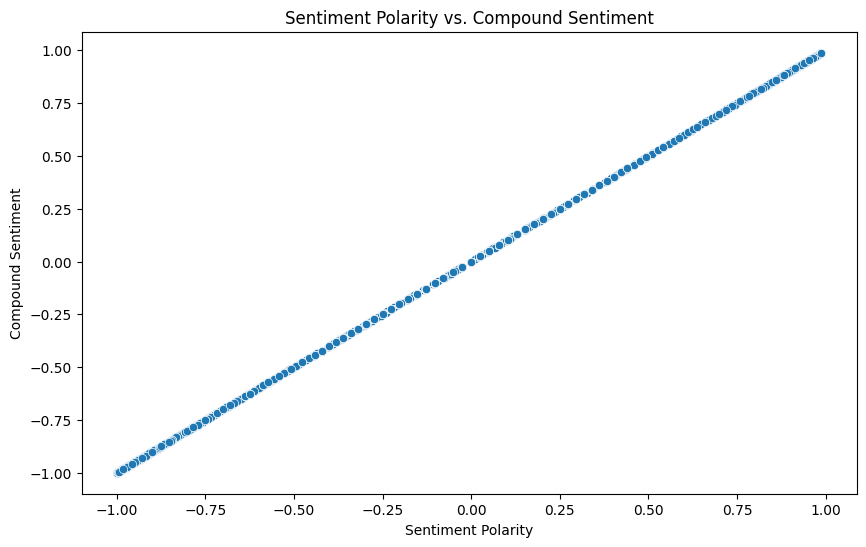

Correlation between sentiment polarity and compound sentiment: 1.0


In [47]:
# Plot correlation between sentiment polarity and compound sentiment
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sentiment_polarity', y='compound_sentiment', data=data_notes)
plt.title('Sentiment Polarity vs. Compound Sentiment')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Compound Sentiment')
plt.show()

# Calculate correlation coefficient
correlation = data_notes[['sentiment_polarity', 'compound_sentiment']].corr().iloc[0, 1]
print(f'Correlation between sentiment polarity and compound sentiment: {correlation}')

Correlation between Sentiment Polarity and Compound Sentiment

The graph achieved a correlation of 1.0 between sentiment_polarity and compound_sentiment, indicating perfect agreement between the two sentiment scoring methods.



### 4.2.3 Distribution of Scores

This is to analyze the distribution of sentiment scores to understand the overall sentiment trends in the data.

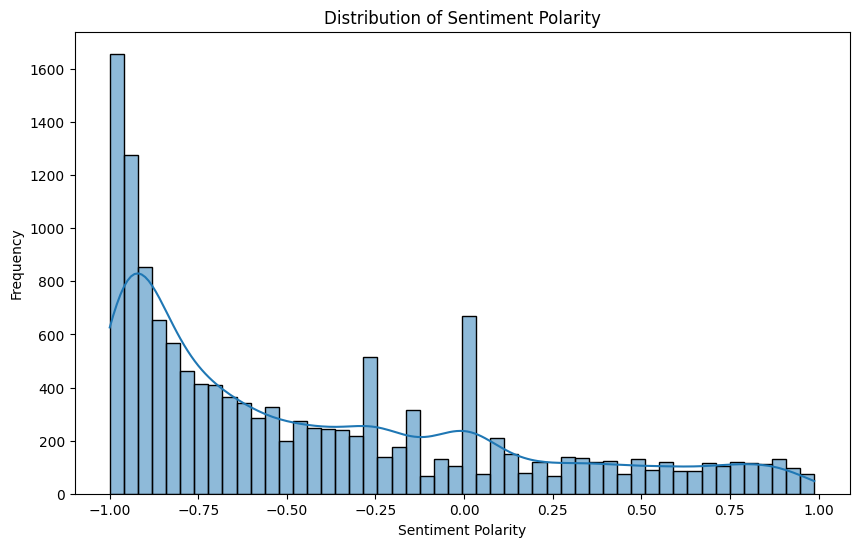

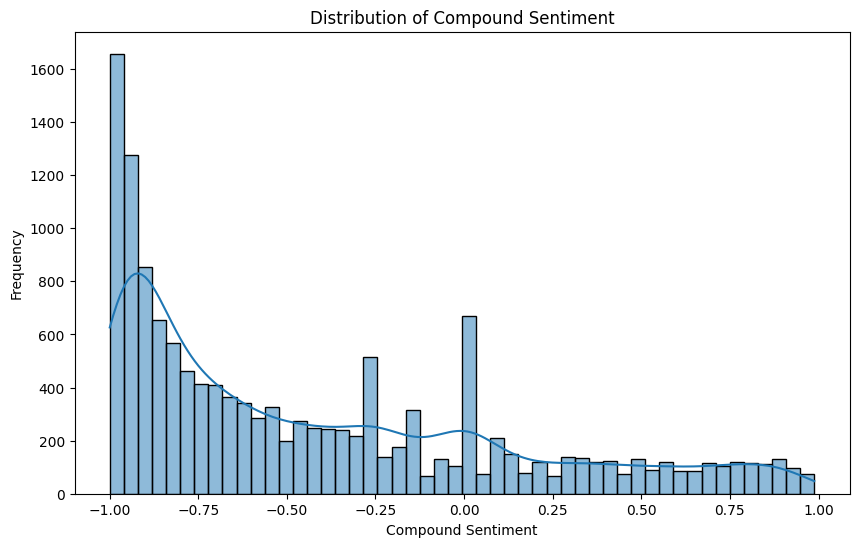

In [78]:
# Distribution of sentiment polarity
plt.figure(figsize=(10, 6))
sns.histplot(data_notes['sentiment_polarity'], bins=50, kde=True,)
plt.title('Distribution of Sentiment Polarity')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

# Distribution of compound sentiment
plt.figure(figsize=(10, 6))
sns.histplot(data_notes['compound_sentiment'], bins=50, kde=True,)
plt.title('Distribution of Compound Sentiment')
plt.xlabel('Compound Sentiment')
plt.ylabel('Frequency')
plt.show()

**Distribution of Sentiment Polarity:**

Sentiment Polarity:

Measures the sentiment expressed in a piece of text, typically on a scale from -1 (very negative) to 1 (very positive).
Positive Polarity: Scores greater than 0 indicate positive sentiment, with higher scores indicating stronger positivity.


**Distribution of compound sentiments**

Right Skew (Positive Skew): In the above right-skewed distribution, the majority of the data points are concentrated on the left side of the distribution (lower values), with a long tail extending to the right (higher values). This means there are fewer data points with high values compared to the lower ones.

### 4.3 Feature Extraction

**Extraction of Bigrams and Trigrams**

we will extract bigrams from the text data and analyze their frequency.

In [49]:
# Load stop words
stop_words = set(stopwords.words('english'))

In [50]:
# Function to preprocess text and remove stopwords
def preprocess_text(text):
    if isinstance(text, str):  # Check if text is a string
        tokens = [word for word in text.split() if word.lower() not in stop_words]
        return ' '.join(tokens)
    else:
        return ''  # Return an empty string if text is not a string

In [51]:
data['cleaned_notes'] = data['notes'].apply(preprocess_text)

In [52]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

In [53]:
# Extract Bigrams
vectorizer = CountVectorizer(ngram_range=(2, 2))

# Check if 'cleaned_notes' exists, if not, try 'notes' or another relevant column
if 'cleaned_notes' in data.columns:
    X = vectorizer.fit_transform(data['cleaned_notes'].fillna('')) # Fill NaN values with empty strings
else:
    # Replace 'notes' with the correct column name if necessary
    print("Warning: 'cleaned_notes' column not found, using 'notes' instead.")
    X = vectorizer.fit_transform(data['notes'].fillna('')) # Fill NaN values with empty strings

bigrams = vectorizer.get_feature_names_out()

Let's visualize the top 25 most frequent bigrams

In [54]:
# Get top 25 most frequent bigrams
bigram_freq = X.sum(axis=0).A1
bigram_freq_df = pd.DataFrame(list(zip(bigrams, bigram_freq)), columns=['bigram', 'frequency'])
top_25_bigrams = bigram_freq_df.nlargest(25, 'frequency')


Extraction of Tigrams

In [55]:
# Extract Trigrams
vectorizer = CountVectorizer(ngram_range=(3, 3))


if 'cleaned_notes' in data.columns:
    X = vectorizer.fit_transform(data['cleaned_notes'].fillna('')) # Fill NaN values with empty strings
else:
    # Replace 'notes' with the correct column name if necessary
    print("Warning: 'cleaned_notes' column not found, using 'notes' instead.")
    X = vectorizer.fit_transform(data['notes'].fillna('')) # Fill NaN values with empty strings

trigrams = vectorizer.get_feature_names_out()

In [62]:
# Get top 10 most frequent trigrams
trigram_freq = X.sum(axis=0).A1
trigram_freq_df = pd.DataFrame(list(zip(trigrams, trigram_freq)), columns=['trigram', 'frequency'])
top_25_trigrams = trigram_freq_df.nlargest(25, 'frequency')


In [59]:
top_25_bigrams

,bigram,frequency
408390,tear gas,1684
349696,riot police,1271
313908,prime minister,1132
604,000 people,1088
304553,police officers,924
419072,took streets,836
365597,security forces,787
219164,last week,643
409615,tens thousands,616
28774,anti government,562


This table represents the frequency of specific bigrams (pairs of consecutive words) in a text dataset, likely related to the analysis of protest events or social unrest. The first column seems to be some form of identifier, and the second column lists the bigrams. The third column shows the frequency of each bigram in the dataset. Here’s an interpretation of some of the most frequent bigrams:

"tear gas" (1684 occurrences): This indicates that the phrase "tear gas" is frequently mentioned, suggesting that tear gas is a common tool used in the context described by the text, likely in protests or crowd control situations.

"riot police" (1271 occurrences): The frequent mention of "riot police" reflects the presence or involvement of riot police in many of the described events.

"prime minister" (1132 occurrences): The occurrence of "prime minister" indicates discussions or references to political leaders, possibly in the context of their actions or involvement in the events.

"000 people" (1088 occurrences): This might refer to phrases like "10,000 people," suggesting frequent references to the number of participants in these events.

"police officers" (924 occurrences): The mention of "police officers" highlights their role in these events, perhaps indicating law enforcement's involvement in managing or responding to the situations.

"took streets" (836 occurrences): The phrase "took to the streets" is common in describing protests or mass gatherings, indicating significant public demonstrations.

"security forces" (787 occurrences): This term is likely used to describe the involvement of various government security personnel in the events.

"last week" (643 occurrences): The phrase "last week" suggests frequent references to recent events, indicating a focus on current or ongoing protests.

"tens thousands" (616 occurrences): This likely refers to "tens of thousands," indicating large crowds or participants in these events.

"anti government" (562 occurrences): The presence of "anti-government" suggests that many protests or events have an anti-government stance.

These bigrams provide insight into common themes or elements present in the dataset, indicating frequent references to protests, government responses, large gatherings, and law enforcement actions.

In [63]:
top_25_trigrams

,trigram,frequency
217031,fired tear gas,422
456769,prior coding decisions,341
65813,based prior coding,338
642592,used tear gas,310
438441,police fired tear,261
385781,note actual number,249
23488,actual number protesters,241
387355,number protesters included,224
561640,source based prior,214
599989,tear gas disperse,187


This table represents the frequency of specific trigrams (three consecutive words) in a text dataset, likely focused on protest events or social unrest. Here's an interpretation of some of the most frequent trigrams:

"fired tear gas" (422 occurrences): This trigram indicates that "fired tear gas" is a common phrase, suggesting frequent reporting of tear gas being used by authorities to disperse crowds.

"prior coding decisions" (341 occurrences) & "based prior coding" (338 occurrences): These trigrams seem to relate to the methodology or decisions made during the coding or categorization process of the data, possibly indicating frequent references to how data was handled or analyzed.

"used tear gas" (310 occurrences): The frequent use of this phrase highlights that tear gas is a commonly mentioned method employed by authorities in the context described.

"police fired tear" (261 occurrences): This trigram likely refers to "police fired tear gas," reinforcing the frequent mention of law enforcement using tear gas.

"note actual number" (249 occurrences), "actual number protesters" (241 occurrences), "number protesters included" (224 occurrences): These trigrams suggest that there is a focus on accurately reporting or analyzing the number of protesters, indicating attention to the scale of the events.

"source based prior" (214 occurrences), "included source based" (165 occurrences), "protesters included source" (162 occurrences): These trigrams appear to relate to how information was sourced or included in the analysis, potentially highlighting the methodology or data sources used in the research.

"tear gas disperse" (187 occurrences): This phrase indicates that tear gas was frequently used to disperse crowds, which aligns with the context of protest events.

"riot police officers" (150 occurrences): The mention of "riot police officers" indicates the involvement of specialized law enforcement units in managing the events.

"tens thousands people" (139 occurrences), "people took streets" (128 occurrences), "people took part" (109 occurrences): These trigrams emphasize the large number of participants and the widespread nature of the protests, with people actively taking to the streets.

"tear gas rubber bullets" (96 occurrences): This phrase suggests that tear gas was often used in conjunction with rubber bullets, highlighting the use of multiple crowd control methods.

These trigrams offer more detailed insights into the common themes and actions present in the dataset, especially focusing on law enforcement tactics like the use of tear gas, the scale of protests, and the methodology used in analyzing or reporting the events.

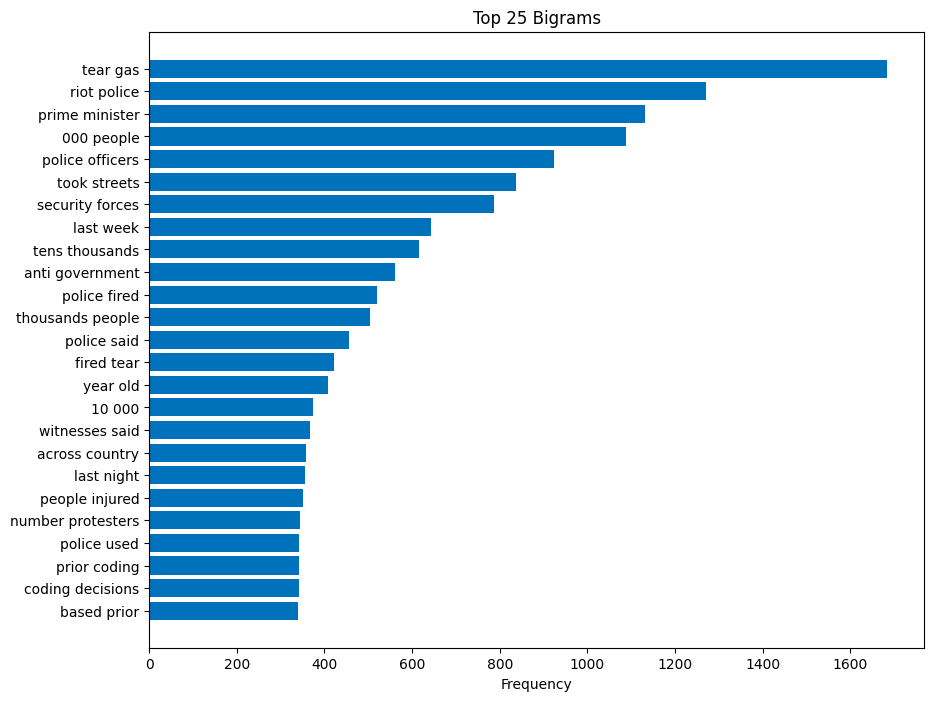

In [74]:
import matplotlib.pyplot as plt

# Plotting the top 25 bigrams
plt.figure(figsize=(10, 8))
plt.barh(top_25_bigrams['bigram'], top_25_bigrams['frequency'], color='#0072bc')
plt.xlabel('Frequency')
plt.title('Top 25 Bigrams')
plt.gca().invert_yaxis()
plt.show()


The chart shows the most frequent bigrams (two-word combinations) in the dataset, along with their frequencies. These bigrams provide insight into common themes and topics present in the text data. Here’s a detailed interpretation of the results:

**"tear gas":** This is the most frequent bigram, indicating a significant focus on events involving the use of tear gas. It suggests that discussions about tear gas are prevalent in the dataset.

**"000 people":** This bigram is likely part of phrases like "thousands of people" or "hundreds of people," pointing to the large-scale involvement of people in the events being discussed.

**"riot police":** The presence of riot police is a common topic, highlighting discussions about law enforcement's role during the events.

**"prime minister":** This indicates that the Prime Minister is frequently mentioned, suggesting discussions about political leadership or actions taken by the Prime Minister.

**"police officers":** Similar to "riot police," this bigram emphasizes the involvement of police officers in the events.

**"took streets":** This suggests that people taking to the streets, a common form of protest or demonstration, is a frequent subject.

**"tens thousands":** This bigram likely extends to "tens of thousands," emphasizing the large number of people involved in the events.

**"last week":** This indicates that many notes refer to events that happened in the recent past, providing a temporal context.

**"last night":** Similar to "last week," this bigram shows a focus on recent events, specifically those that occurred the previous night.

**"thousands people"**: Again, emphasizing the large-scale involvement of people.

**"police said":** This suggests that statements or reports from the police are frequently mentioned, indicating a focus on official responses or accounts.

**"general strike":** This bigram points to discussions about widespread labor strikes, which are significant forms of protest.

**"10 000":** Likely part of phrases indicating the number of people involved in the events.

**"anti government":** This indicates that many notes discuss anti-government sentiments or actions.

**"year old":** This could refer to the ages of individuals mentioned in the notes, possibly highlighting the demographics involved.

**"took part":** Suggests discussions about participation in events or activities.

**"people arrested":** Indicates that the arrest of individuals is a frequent topic.

**"european union":** Points to discussions involving the European Union, suggesting a broader geopolitical context.

**"across country":** Indicates that events are happening nationwide, highlighting the widespread nature of the events.

**"protest government":** Suggests that many notes discuss protests against the government.

**"people marched":** Highlights that marching is a common form of protest mentioned in the notes.

**"police used":** Likely extends to "police used tear gas" or similar phrases, emphasizing police actions.

**"yesterday protest":** Indicates that protests occurring recently (yesterday) are frequently mentioned.

**"people injured":** Highlights that injuries sustained by people during events are a significant topic.

**"per cent":** Likely part of statistical discussions, possibly about participation rates, public opinion, or other relevant metrics.

Overall, the bigrams highlight themes of protest, police actions, large-scale public involvement, political leadership, and recent events. These frequent phrases help identify the primary subjects and concerns within the dataset

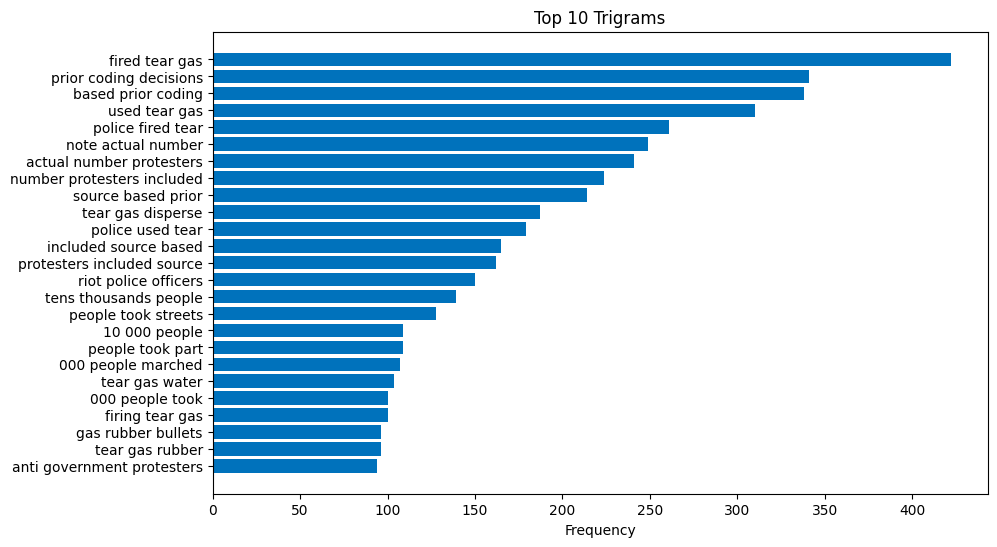

In [75]:
# Plotting the top 10 trigrams
plt.figure(figsize=(10, 6))
plt.barh(top_10_trigrams['trigram'], top_10_trigrams['frequency'], color='#0072bc')
plt.xlabel('Frequency')
plt.title('Top 10 Trigrams')
plt.gca().invert_yaxis()
plt.show()

The chart shows the most frequent trigrams (three-word combinations) in the dataset, along with their frequencies. The trigrams provide insight into common phrases and themes present in the text data. Here’s a detailed interpretation of the results:

**"fired tear gas":** This trigram is the most frequent, indicating that many notes discuss incidents where tear gas was fired. The high frequency suggests that this is a significant topic in the dataset.

**"used tear gas":** Similar to the previous trigram, this one also points to discussions about the use of tear gas, showing that it’s a prevalent subject.

**"police used tear":** This phrase likely extends to "police used tear gas," emphasizing the involvement of police in using tear gas during events.

**"police fired tear":** This likely extends to "police fired tear gas," reinforcing the theme of police actions involving tear gas.

**"port au prince":** This trigram indicates that Port-au-Prince, the capital of Haiti, is frequently mentioned, suggesting that many notes might be discussing events occurring there.

**"president hugo chavez":** Mentions of President Hugo Chavez suggest discussions related to his actions or influence, possibly in a historical or political context.

**"000 people marched":** This is likely part of phrases like "thousands of people marched," indicating significant protest events involving large crowds.

**"10 000 people":** Similar to the previous point, this suggests discussions about large groups of people, possibly in the context of protests or demonstrations.

**"people took streets":** This trigram indicates that people taking to the streets, a common form of protest, is a frequent topic.

**"tens thousands people":** This also points to discussions involving large groups of people, emphasizing the scale of the events being described.

Overall, the trigrams highlight themes of police action, the use of tear gas, large-scale protests, and specific geographical and political contexts (such as Port-au-Prince and Hugo Chavez). These frequent phrases help identify the primary subjects and concerns within the dataset.